In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df = pd.merge(pd.merge(churn_data, customer_data, how='inner', on='customerID'), internet_data, how='inner', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [8]:
df.shape

(7043, 21)

In [9]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [10]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


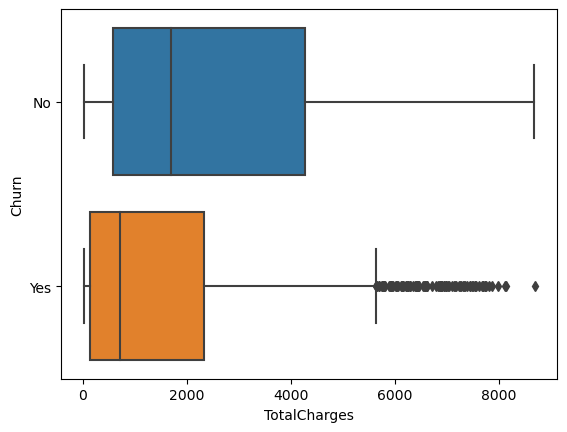

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].astype('category')

sns.boxplot(x = 'TotalCharges', y = 'Churn', data = df)
plt.show()

In [19]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[varlist] = df[varlist].apply(binary_map)

In [20]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [22]:
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)
df = pd.concat([df, dummy1], axis=1)

In [24]:
df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [25]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             7043 non-null   object  
 1   tenure                                 7043 non-null   int64   
 2   PhoneService                           7043 non-null   int64   
 3   PaperlessBilling                       7043 non-null   int64   
 4   MonthlyCharges                         7043 non-null   float64 
 5   TotalCharges                           7032 non-null   float64 
 6   Churn                                  7043 non-null   category
 7   SeniorCitizen                          7043 non-null   int64   
 8   Partner                                7043 non-null   int64   
 9   Dependents                             7043 non-null   int64   
 10  Contract_One year                      7043 non-null   uint8

In [27]:
df.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [29]:
df = df[~np.isnan(df['TotalCharges'])]

In [30]:
df.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(['customerID'], axis=1)
y = X.pop('Churn')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1


In [34]:
df.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,0.015683,0.381912,0.163386,0.202338,0.563801,...,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.008392,0.018397,-0.001078,-0.003142,0.004442,...,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.156258,-0.013957,-0.110131,-0.052278,-0.146281,...,-0.320592,0.127056,-0.320592,0.104079,-0.320592,0.037536,-0.320592,0.224241,-0.320592,0.211583
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.219874,0.097825,-0.112343,0.004810,-0.073256,...,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,0.102411,0.319072,0.064653,0.170569,0.358036,...,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,1.000000,0.016957,-0.210550,-0.046491,-0.116205,...,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,0.016957,1.000000,0.452269,0.083067,0.247334,...,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.210550,0.452269,1.000000,0.069222,0.201699,...,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375
Contract_One year,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.046491,0.083067,0.069222,1.000000,-0.288843,...,0.038061,0.084113,0.038061,0.102911,0.038061,0.096258,0.038061,0.061930,0.038061,0.064780
Contract_Two year,0.563801,0.004442,-0.146281,-0.073256,0.358036,-0.116205,0.247334,0.201699,-0.288843,1.000000,...,0.217542,0.111391,0.217542,0.165248,0.217542,0.240924,0.217542,0.072124,0.217542,0.075603


In [39]:
from statsmodels.tools import add_constant as add_constant
X_train_constant = add_constant(X_train)
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,1.0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5790,1.0,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,...,0,1,0,0,0,0,0,1,0,1
6498,1.0,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
880,1.0,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,1.0,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1


In [40]:
cols = X_train_constant.columns
model = smd.Logit(y_train, X_train_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                  0.2912
Time:                        12:03:25   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3085   3.27e+06  -7.06e-07      1.000   -6.41e+06    6.41e+06
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                             -0.6789   3.27e+06  -2.08e-07      1.000   -6.41e+06    6.41e+06
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.3970        nan        nan        nan         nan         nan
MultipleLines_No phone service           -1.6296   3.27e+06  -4.99e-07      1.000   -6.41e+06    6.41e+06
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_No internet service       -0.3970   1.52e+07   -2.6e-08      1.000   -2.99e+07    2.99e+07
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_No internet service         -0.3970   1.52e+07   -2.6e-08      1.000   -2.99e+07    2.99e+07
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_No internet service     -0.3970   1.52e+07   -2.6e-08      1.000   -2.99e+07    2.99e+07
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No internet service          -0.3970   1.52e+07   -2.6e-08      1.000   -2.99e+07    2.99e+07
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_No internet service          -0.3970   1.52e+07  

In [41]:
drop_cols = ['PhoneService', 'Partner', 'Dependents', 'PaymentMethod_Electronic check', 
             'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_No', 'MultipleLines_No phone service', 
             'MultipleLines_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes']
X_train_constant.drop(drop_cols, axis=1, inplace=True)

In [42]:
model = smd.Logit(y_train, X_train_constant)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.411455
         Iterations 8


In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4907
Method:                           MLE   Df Model:                           14
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                  0.2839
Time:                        12:05:45   Log-Likelihood:                -2025.2
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.169     -8.204      0.000      -1.720      -1.057
tenure                                   -1.4099      0.186     -7.595      0.000      -1.774      -1.046
PaperlessBilling                          0.3758      0.089      4.215      0.000       0.201       0.550
MonthlyCharges                           -0.0334      0.167     -0.200      0.842      -0.361       0.294
TotalCharges                              0.7017      0.196      3.575      0.000       0.317       1.087
SeniorCitizen                             0.4705      0.099      4.767      0.000       0.277       0.664
Contract_One year                        -0.7004      0.127     -5.501      0.000      -0.950      -0.451
Contract_Two year                        -1.2981      0.210     -6.167      0.000      -1.711      -0.886
PaymentMethod_Credit card (automatic)    -0.2987      0.111     -2.703      0.007      -0.515      -0.082
InternetService_Fiber optic               0.7422      0.199      3.721      0.000       0.351       1.133
OnlineSecurity_No internet service       -0.2121   1.53e+07  -1.39e-08      1.000      -3e+07       3e+07
OnlineSecurity_Yes                       -0.4128      0.104     -3.955      0.000      -0.617      -0.208
OnlineBackup_No internet service         -0.2121   1.53e+07  -1.39e-08      1.000      -3e+07       3e+07
OnlineBackup_Yes                         -0.1680      0.095     -1.771      0.076      -0.354       0.018
DeviceProtection_No internet service     -0.2121   1.53e+07  -1.39e-08      1.000      -3e+07       3e+07
TechSupport_No internet service          -0.2121   1.53e+07  -1.39e-08      1.000      -3e+07       3e+07
TechSupport_Yes                          -0.4194      0.106     -3.949      0.000      -0.628      -0.211
StreamingTV_No internet service          -0.2121   1.53e+07  -1.39e-08      1.000      -3e+07       3e+07
StreamingMovies_No internet service      -0.2121   1.53e+07  -1.39e-08      1.000      -3e+07       3e+07
StreamingMovies_Yes                       0.2707      0.112      2.412      0.016       0.051       0.491
=========================================================================================================
"""

In [44]:
cols_model = ['tenure', 'PaperlessBilling', 'MonthlyCharges',  
             'SeniorCitizen', 'Contract_One year', 'Contract_Two year', 
             'PaymentMethod_Credit card (automatic)', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 
             'TechSupport_Yes', 'StreamingMovies_Yes']
X_train1 = X_train_constant[cols_model]

In [45]:
log = LogisticRegression()
log.fit(X_train1, y_train)

LogisticRegression()

In [46]:
y_train_pred = log.predict(X_train1)

In [47]:
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.8033319788703779

<Axes: >

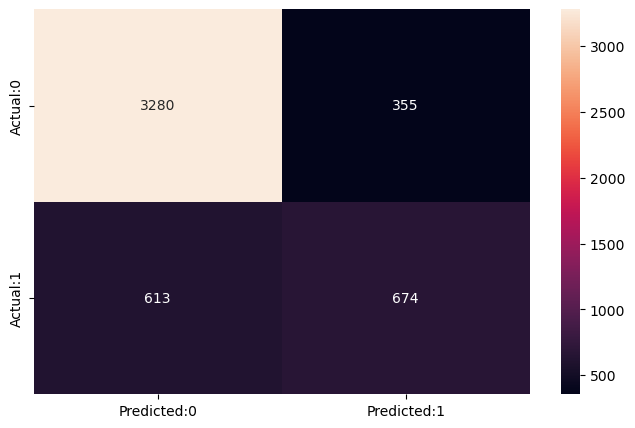

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')